In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori , association_rules

In [4]:
df = pd.read_csv('mar.csv' , header = None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
transactions = []
for i in range(len(df)):
    transactions.append([str(df.values[i , j])
                        for j in range(df.shape[1])
                        if str(df.values[i , j]) != 'nan'])

In [12]:
print(f"transaction : {transactions[0]}")

transaction : ['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil']


In [23]:
from mlxtend.preprocessing import TransactionEncoder

In [25]:
te = TransactionEncoder()

In [27]:
te_arr = te.fit(transactions).transform(transactions)

In [28]:
df = pd.DataFrame(te_arr , columns = te.columns_)

In [29]:
df.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [33]:
freq_itemsets = apriori(df , min_support = 0.05 , use_colnames = True)

In [34]:
print(f"frequent items set : {freq_itemsets.head()}")

frequent items set :     support     itemsets
0  0.087188    (burgers)
1  0.081056       (cake)
2  0.059992    (chicken)
3  0.163845  (chocolate)
4  0.080389    (cookies)


In [40]:
rules = association_rules(freq_itemsets , metric = "lift" , min_threshold = 1.0)

In [48]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
4,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,1.0,0.018223,1.102008,0.400606,0.169312,0.092566,0.296796
5,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,1.0,0.018223,1.159314,0.369437,0.169312,0.137421,0.296796
1,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,1.0,0.013604,1.122357,0.308965,0.150648,0.109018,0.271158
0,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,1.0,0.013604,1.073256,0.339197,0.150648,0.068256,0.271158
3,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,1.0,0.008090,1.062815,0.193648,0.138707,0.059103,0.248515
2,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,1.0,0.008090,1.043158,0.208562,0.138707,0.041372,0.248515


In [41]:
print("\n Associations rules : \n " , rules[['antecedents' , 'consequents' , 'support' , 'confidence' , 'lift']])


 Associations rules : 
         antecedents      consequents   support  confidence      lift
0  (mineral water)      (chocolate)  0.052660    0.220917  1.348332
1      (chocolate)  (mineral water)  0.052660    0.321400  1.348332
2  (mineral water)           (eggs)  0.050927    0.213647  1.188845
3           (eggs)  (mineral water)  0.050927    0.283383  1.188845
4  (mineral water)      (spaghetti)  0.059725    0.250559  1.439085
5      (spaghetti)  (mineral water)  0.059725    0.343032  1.439085


In [42]:
rules = rules.sort_values(by = "lift" , ascending = False)

In [43]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
4,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,1.0,0.018223,1.102008,0.400606,0.169312,0.092566,0.296796
5,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,1.0,0.018223,1.159314,0.369437,0.169312,0.137421,0.296796
1,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,1.0,0.013604,1.122357,0.308965,0.150648,0.109018,0.271158
0,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,1.0,0.013604,1.073256,0.339197,0.150648,0.068256,0.271158
3,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,1.0,0.008090,1.062815,0.193648,0.138707,0.059103,0.248515


In [45]:
import seaborn as sns 
import matplotlib.pyplot as plt

<Axes: xlabel='support', ylabel='confidence'>

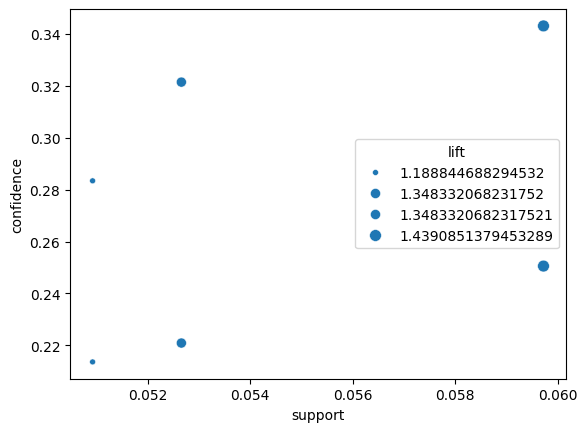

In [47]:
sns.scatterplot(x = 'support' , y = 'confidence' , size = 'lift' , data = rules)